### Лабораторная работа №1
#### Разведочный анализ

Датасет **Car Accidents in Brazil (2017-2023)** https://www.kaggle.com/datasets/mlippo/car-accidents-in-brazil-2017-2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [44]:
df = pd.read_csv("datasets/accidents_2017_to_2023_english.csv")

In [45]:
df.head(10)

,inverse_data,week_day,hour,state,road_id,km,city,cause_of_accident,type_of_accident,victims_condition,...,slightly_injured,severely_injured,uninjured,ignored,total_injured,vehicles_involved,latitude,longitude,regional,police_station
0,2017-01-01,sunday,01:45:00,RS,116.0,"34,9",VACARIA,Mechanical loss/defect of vehicle,Rear-end collision,With injured victims,...,4,0,2,0,4,2,-28.50712,-50.94118,SPRF-RS,DEL05-RS
1,2017-01-01,sunday,01:00:00,PR,376.0,636,TIJUCAS DO SUL,Incompatible velocity,Run-off-road,With dead victims,...,0,0,1,0,0,2,-25.75400,-49.12660,SPRF-PR,DEL01-PR
2,2017-01-01,sunday,04:40:00,BA,101.0,65,ENTRE RIOS,Driver was sleeping,Head-on collision,With dead victims,...,1,1,2,0,2,2,-11.96180,-38.09530,SPRF-BA,DEL01-BA
3,2017-01-01,sunday,06:30:00,PA,316.0,"72,5",CASTANHAL,Driver's lack of attention to conveyance,Side impact collision,With dead victims,...,0,0,3,0,0,3,-1.28998,-47.83483,SPRF-PA,DEL01-PA
4,2017-01-01,sunday,09:00:00,GO,20.0,"220,5",POSSE,Road's defect,Collision with fixed object,With injured victims,...,2,1,0,0,3,1,-14.14221,-46.32259,SPRF-DF,DEL02-DF
5,2017-01-01,sunday,07:40:00,RN,405.0,30,MOSSORO,Alcohol consumption,Head-on collision,With dead victims,...,0,0,1,0,0,2,-5.31360,-37.56900,SPRF-RN,DEL04-RN
6,2017-01-01,sunday,10:35:00,PR,376.0,"249,5",APUCARANA,Disrespect of safe distance from the next car,Rear-end collision,With injured victims,...,1,0,4,0,1,2,-23.61074,-51.39895,SPRF-PR,DEL07-PR
7,2017-01-01,sunday,11:50:00,MG,262.0,"483,1",BOM DESPACHO,Driver was sleeping,Side impact collision,Without victims,...,0,0,2,0,0,2,-19.78562,-45.30956,SPRF-MG,DEL08-MG
8,2017-01-01,sunday,10:30:00,MT,364.0,469,VARZEA GRANDE,Mechanical loss/defect of vehicle,Overturn,With injured victims,...,3,0,0,0,3,1,-15.35687,-56.41299,SPRF-MT,DEL01-MT
9,2017-01-01,sunday,08:30:00,MA,316.0,375,BACABAL,Alcohol consumption,Head-on collision,With dead victims,...,0,0,1,0,0,2,-4.21350,-44.66290,SPRF-MA,DEL02-MA


1. Дата
2. День недели
3. Время
4. Штат
5. Номер дороги
6. Километр
7. Город
8. Причина аварии
9. Информация о жертвах
10. Направление дороги(?)
11. Погода
12. Тип дороги
13. разграничение дорог
14. Кол-во людей
15. Был ли смертельный исход
...
22. Кол-во пострадавших
23. Кол-во машин

In [46]:
df.describe()

,road_id,people,deaths,slightly_injured,severely_injured,uninjured,ignored,total_injured,vehicles_involved,latitude,longitude
count,462162.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,4.631520e+05,4.631520e+05
mean,213.432900,2.362373,0.079235,0.835469,0.259530,1.044070,0.144069,1.094999,1.645725,-2.343287e+03,-8.924977e+03
std,130.757607,1.924801,0.332169,1.075275,0.602814,1.502419,0.438168,1.205351,0.731394,1.519113e+06,5.903043e+06
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.033383e+09,-4.016764e+09
25%,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.533123e+01,-5.030294e+01
50%,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-2.042034e+01,-4.780831e+01
75%,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-1.282657e+01,-4.264249e+01
max,498.000000,80.000000,21.000000,61.000000,31.000000,73.000000,54.000000,66.000000,23.000000,1.630000e+02,7.170000e+02


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inverse_data        463152 non-null  object 
 1   week_day            463152 non-null  object 
 2   hour                463152 non-null  object 
 3   state               463152 non-null  object 
 4   road_id             462162 non-null  float64
 5   km                  462162 non-null  object 
 6   city                463152 non-null  object 
 7   cause_of_accident   463152 non-null  object 
 8   type_of_accident    463152 non-null  object 
 9   victims_condition   463152 non-null  object 
 10  weather_timestamp   463152 non-null  object 
 11  road_direction      463152 non-null  object 
 12  wheather_condition  463152 non-null  object 
 13  road_type           463152 non-null  object 
 14  road_delineation    463152 non-null  object 
 15  people              463152 non-nul

Пропусков нет

#### Подготовка данных

In [42]:
df_clear = df.drop('User ID', axis=1)
df_clear.columns = ['model', 'os', 'app_usage_h_day', 'screen_on_time_h_day', 'batt_drain_mah_day', 'apps_count', 'data_usage_MB_day', 'age', 'gender', 'behavior_class']
df_clear['app_usage_h_day'] = round(df_clear['app_usage_h_day'] / 60, 1)

df_clear['gender'] = df_clear['gender'].replace({'Male': 0, 'Female': 1})
df_clear['os'] = df_clear['os'].replace({'Android': 0, 'iOS': 1})
df_clear['model'] = df_clear['model'].replace({'Google Pixel 5': 0, 'OnePlus 9': 1, 'Xiaomi Mi 11': 2, 'iPhone 12': 3, 'Samsung Galaxy S21': 4})

df_clear.head()

C:\Temp\ipykernel_10672\3694037211.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clear['gender'] = df_clear['gender'].replace({'Male': 0, 'Female': 1})
C:\Temp\ipykernel_10672\3694037211.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clear['os'] = df_clear['os'].replace({'Android': 0, 'iOS': 1})
C:\Temp\ipykernel_10672\3694037211.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)

,model,os,app_usage_h_day,screen_on_time_h_day,batt_drain_mah_day,apps_count,data_usage_MB_day,age,gender,behavior_class
0,0,0,6.6,6.4,1872,67,1122,40,0,4
1,1,0,4.5,4.7,1331,42,944,47,1,3
2,2,0,2.6,4.0,761,32,322,42,0,2
3,0,0,4.0,4.8,1676,56,871,20,0,3
4,3,1,3.1,4.3,1367,58,988,31,1,3


Распределение по моделям

<Axes: xlabel='model', ylabel='count'>

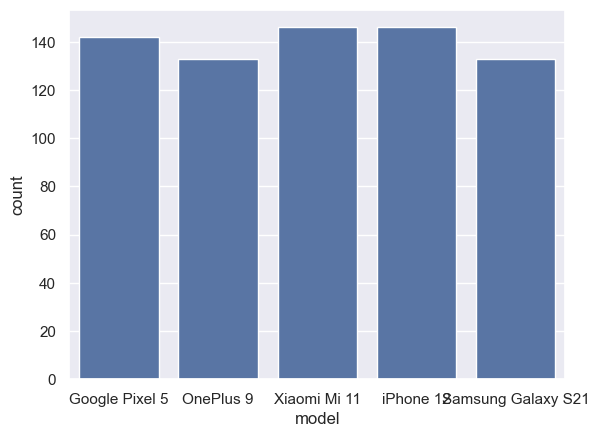

In [25]:
sns.countplot(x=df_clear['model'])

Распределение по ОС

<Axes: xlabel='os', ylabel='count'>

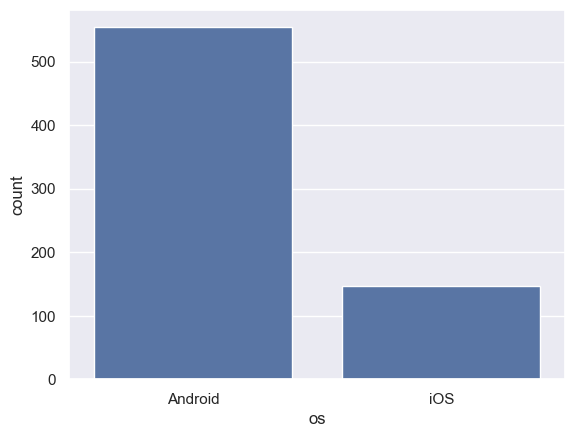

In [26]:
sns.countplot(x=df_clear['os'])

Android сильно перевешивает, что логично, тк.к. ios присутствует только на iphone, следовательно этот столбец не несет в себе особо важной информации

<Axes: xlabel='gender', ylabel='count'>

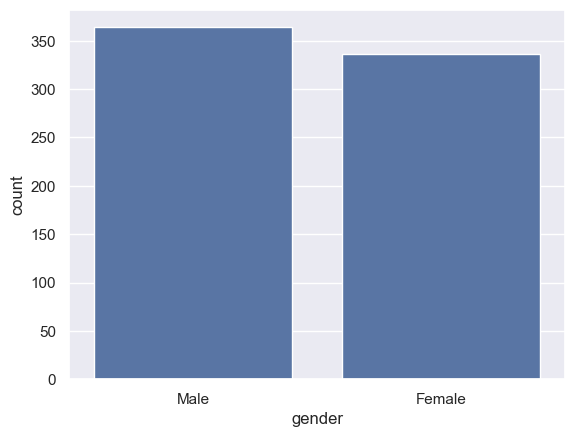

In [28]:
sns.countplot(x=df_clear['gender'])

<Axes: xlabel='age', ylabel='screen_on_time_h_day'>

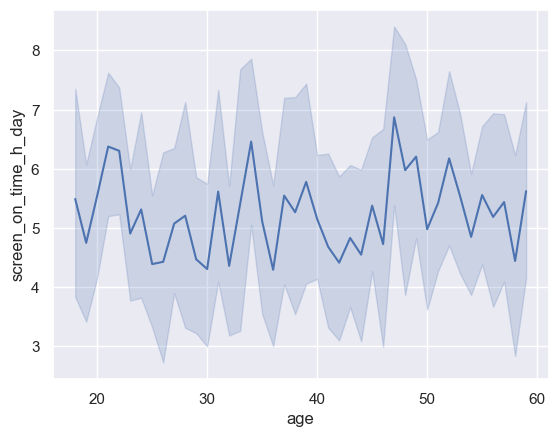

In [32]:
sns.lineplot(data=df_clear, x='age', y='screen_on_time_h_day')

<Axes: xlabel='model', ylabel='screen_on_time_h_day'>

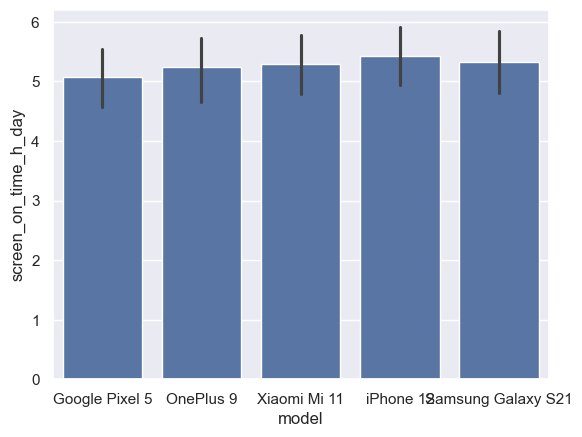

In [33]:
sns.barplot(data=df_clear, x='model', y='screen_on_time_h_day')

<Axes: xlabel='age_group', ylabel='count'>

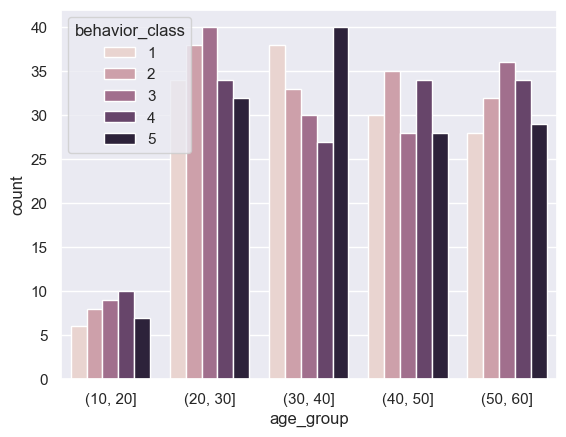

In [38]:
df_clear['age_group'] = pd.cut(x=df_clear['age'], bins=[10, 20, 30, 40, 50, 60])
sns.countplot(data=df_clear, x='age_group', hue='behavior_class')

<Axes: >

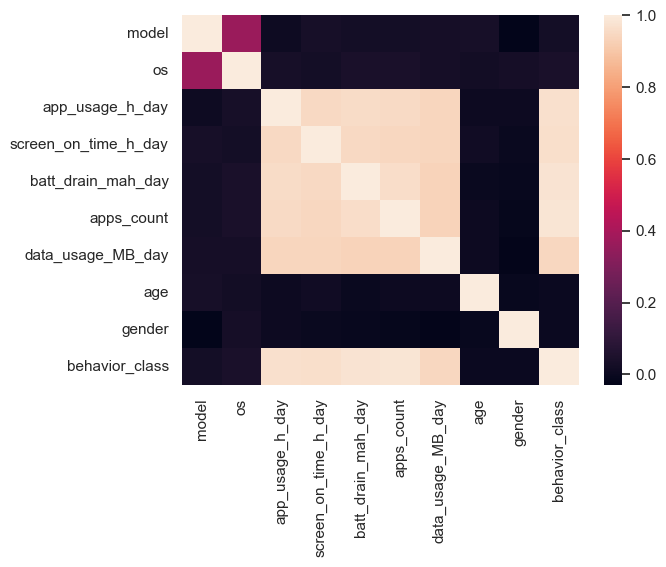

In [43]:
sns.heatmap(df_clear.corr(numeric_only=True))